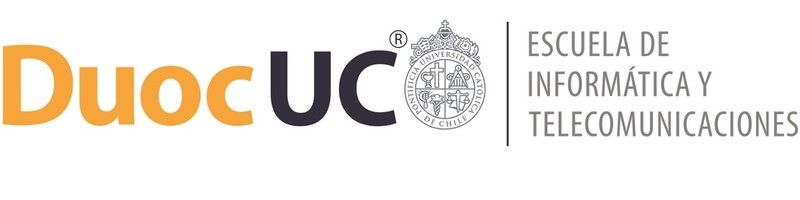

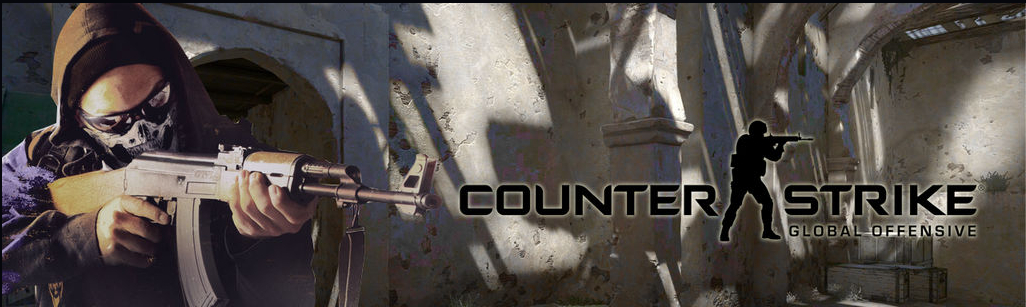

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Marcos Bombalas
* Cristian Mansilla
* Benjamín Ruiz

Docente: Giocrisrai Godoy

Sección: MLY0100 - 001D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

In [ ]:
#Primeramente, se harán las importaciones de las librerías y del dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
#file_path = '/content/drive/Shareddrives/ML Caso CSGO/Anexo_ET_demo_round_traces.csv'
file_path = '/content/drive/MyDrive/ML Caso CSGO/Anexo_ET_demo_round_traces.csv'


df = pd.read_csv(file_path, sep=';')

Mounted at /content/drive


<ipython-input-1-a4e242246ff5>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')


Saving csgo.csv to csgo.csv


<ipython-input-1-7ebdc71b8c7d>:12: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep=';')


In [ ]:
#Primeras 10 filas
df.head(10)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
5,605,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,850,3750,0,0,0,0
6,606,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,400,3750,0,0,0,0
7,607,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,1,0,0,800,3750,0,0,1,0
8,608,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,3,0,1,1,850,3750,3,1,0,1
9,609,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,2,0,2,0,850,3750,2,0,0,2


In [ ]:
#Verificar columnas y tipo de dato
columnas = df.columns
for columna in columnas:
  if df[columna].dtype == int:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa discreta")
  elif df[columna].dtype == float:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa continua")
  elif df[columna].dtype == object:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa nominal")
  elif df[columna].dtype == bool:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa ordinal")

Columna Unnamed: 0 ------ Tipo de variable: Cuantitativa discreta
Columna Map ------ Tipo de variable: Cualitativa nominal
Columna Team ------ Tipo de variable: Cualitativa nominal
Columna InternalTeamId ------ Tipo de variable: Cuantitativa discreta
Columna MatchId ------ Tipo de variable: Cuantitativa discreta
Columna RoundId ------ Tipo de variable: Cuantitativa discreta
Columna RoundWinner ------ Tipo de variable: Cualitativa nominal
Columna MatchWinner ------ Tipo de variable: Cualitativa nominal
Columna Survived ------ Tipo de variable: Cualitativa ordinal
Columna AbnormalMatch ------ Tipo de variable: Cualitativa ordinal
Columna TimeAlive ------ Tipo de variable: Cualitativa nominal
Columna TravelledDistance ------ Tipo de variable: Cualitativa nominal
Columna RLethalGrenadesThrown ------ Tipo de variable: Cuantitativa discreta
Columna RNonLethalGrenadesThrown ------ Tipo de variable: Cuantitativa discreta
Columna PrimaryAssaultRifle ------ Tipo de variable: Cuantitativa continu

### **Hipótesis.**

De acuerdo con los datos que se pueden apreciar, se podría trabajar bajo las siguientes hipótesis:



* ¿Afecta al equipo el uso de granadas letales y no letales para ganar la ronda?

* De acuerdo con lo gastado en su equipamiento ¿Tiene más posibilidades de sobrevivir?

* ¿ Afecta el uso de granadas no letales y del valor de su equipo en la cantidad de muertes que el jugador realiza?

* ¿Que tipo de arma es más popular, hay una relación entre popularidad y posibilidades de ganar?


* ¿Existe una relacion entre los headshot y los mapas?


## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

###Verificación de datos nulos y posibles errores en DataFrame

In [ ]:
df.isnull().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

In [ ]:
#Selección de datos nulos en columna MatchWinner
df[df['MatchWinner'].isnull()]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
29,629,de_inferno,CounterTerrorist,2,4,3,False4,NaN,True,False,...,0,0,0,0,4250,22850,2,0,1,2


In [ ]:
#De acuerdo al negocio, las partidas, como mínimo, duran 16 rondas. Se verifica
#esto con este código
for partida in df['MatchId'].unique():
  if df[df['MatchId']==partida]['RoundId'].unique().size<16:
    print(f"Partida de Id {partida}: Cantidad de Rondas: {df[df['MatchId']==partida]['RoundId'].unique()}")

Partida de Id 11: Cantidad de Rondas: [1 2 3 4 5 6 7]
Partida de Id 181: Cantidad de Rondas: [1 2 3 4 5 6]
Partida de Id 444: Cantidad de Rondas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Partida de Id 507: Cantidad de Rondas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Partida de Id 511: Cantidad de Rondas: [1 2 3 4 5]


In [ ]:
#Verificación de la cantidad de jugadores por equipo (ver si hay que
#eliminar partidas por un número incorrecto de equipo)
for partida in df['MatchId'].unique():
  cant_t1 = df[(df['InternalTeamId']==1) & (df['MatchId']==partida)]['Map'].count()
  cant_t2 = df[(df['InternalTeamId']==2) & (df['MatchId']==partida)]['Map'].count()
  if(cant_t1-cant_t2!=0):
    print(f"Partida {partida}: {cant_t1-cant_t2}")

Partida 6: 1
Partida 179: -1
Partida 395: -1


###Medidas de Posición

In [ ]:
#Resumen de Medidas de posición, para datos numéricos
df.describe(include="number")

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [ ]:
#Resumen de Medidas de posición, para datos categóricos
df.describe(include='object')

,Map,Team,RoundWinner,MatchWinner,TimeAlive,TravelledDistance,FirstKillTime
count,79157,79155,79157,79156,79157,79157,79157
unique,4,2,5,2,51627,78001,33855
top,de_inferno,Terrorist,False,False,0.0,0.0,0.0
freq,28869,39591,23195,42017,68,272,5305


In [ ]:
# Medidas de dispersión de todos los datos
for dato in df.columns:
  if df[dato].dtype in [int,float]:
    print(f"La media de la columna {dato} es: {df[dato].mean()} - La moda es: {df[dato].mode()[0]} - La mediana es: {df[dato].median()} - La desviación estándar es: {df[dato].std()}\n")
  elif df[dato].dtype in [object, bool]:
    print(f"En la columna {dato}, existen {df[dato].unique().size} dato/s. Los datos son: {df[dato].unique()}. El que más se repite es {df[dato].value_counts().index[0]} con {df[dato].value_counts().iloc[0]} repeticiones.\n")

La media de la columna Unnamed: 0 es: 60570.19364048663 - La moda es: 600 - La mediana es: 56720.0 - La desviación estándar es: 36436.59838644672

En la columna Map, existen 4 dato/s. Los datos son: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']. El que más se repite es de_inferno con 28869 repeticiones.

En la columna Team, existen 3 dato/s. Los datos son: ['Terrorist' 'CounterTerrorist' nan]. El que más se repite es Terrorist con 39591 repeticiones.

La media de la columna InternalTeamId es: 1.500006316560759 - La moda es: 2 - La mediana es: 2.0 - La desviación estándar es: 0.5000031582704048

La media de la columna MatchId es: 250.52503253028792 - La moda es: 29 - La mediana es: 236.0 - La desviación estándar es: 149.5578044084223

La media de la columna RoundId es: 12.765516631504479 - La moda es: 1 - La mediana es: 12.0 - La desviación estándar es: 7.432837007057751

En la columna RoundWinner, existen 5 dato/s. Los datos son: ['False' 'True' 'False4' True False]. El que más se re

###Graficos

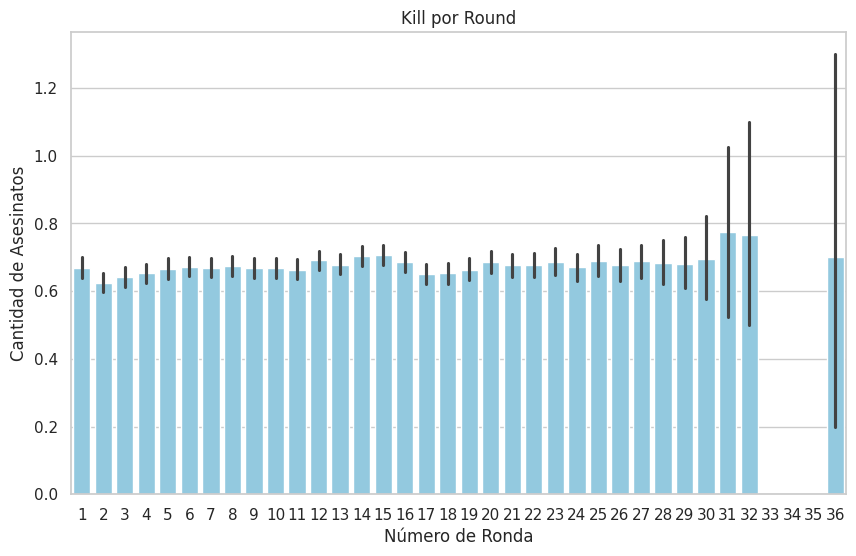

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='RoundId', y='RoundKills', data=df, color='skyblue')
plt.title('Kill por Round')
plt.xlabel('Número de Ronda')
plt.ylabel('Cantidad de Asesinatos')
plt.show()

Se puede apreciar que, en promedio, la cantidad de Asesinatos por Ronda es parejo, independientemente del número de ronda.

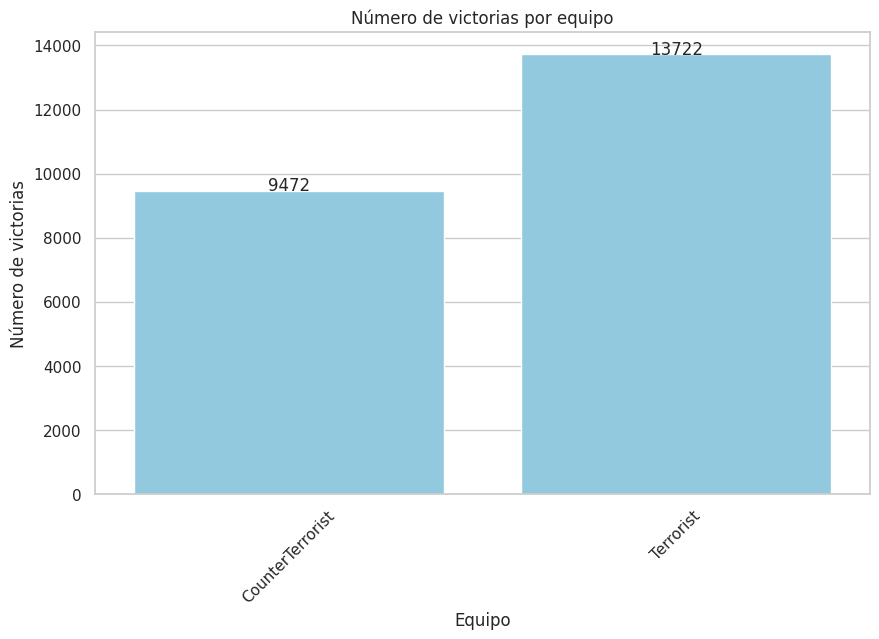

In [ ]:
victorias_por_equipo = df.groupby('Team')['RoundWinner'].apply(lambda x: (x == True).sum()).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='RoundWinner', data=victorias_por_equipo, color='skyblue')

for index, value in enumerate(victorias_por_equipo['RoundWinner']):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.title('Número de victorias por equipo')
plt.xlabel('Equipo')
plt.ylabel('Número de victorias')
plt.xticks(rotation=45)
plt.show()

Se puede apreciar una mayor cantidad de victorias para el grupo terrorista que el grupo contra terrorista.

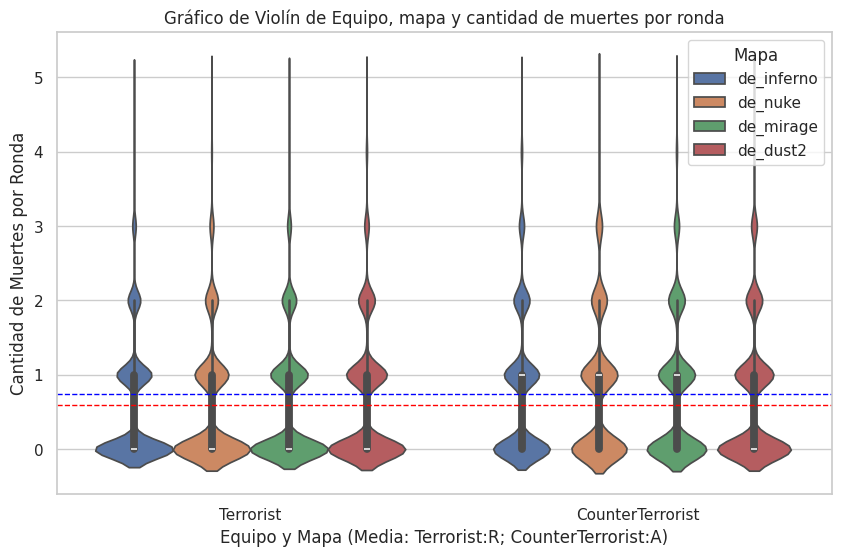

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Team", y="RoundKills", hue="Map", data=df, gridsize=100)
plt.legend(title='Mapa')
# Agregar línea de media
for equipo in df['Team'].unique():
    media = df[df['Team'] == equipo]['RoundKills'].mean()
    if equipo == "Terrorist":
      plt.axhline(media, color='red', linestyle='--', linewidth=1)
    else:
      plt.axhline(media, color='blue', linestyle='--', linewidth=1)
plt.title('Gráfico de Violín de Equipo, mapa y cantidad de muertes por ronda')
plt.xlabel('Equipo y Mapa (Media: Terrorist:R; CounterTerrorist:A)')
plt.ylabel('Cantidad de Muertes por Ronda')
plt.show()

Se puede apreciar que, independiente del mapa, existe mayor densidad en que los jugadores de ambos equipos logren menos de una muerte por ronda

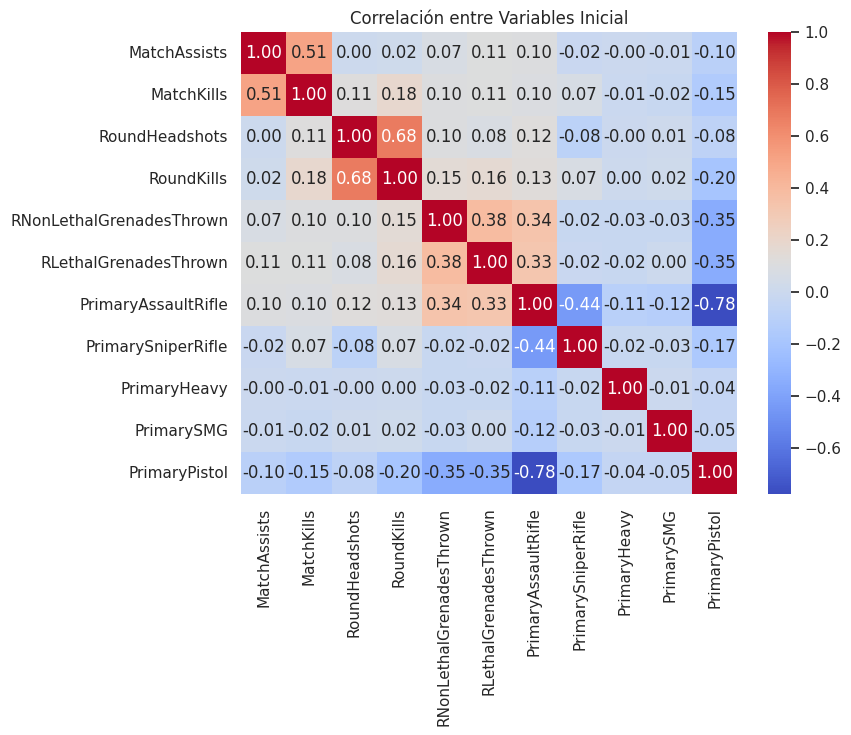

In [ ]:
correlacion_inicial = df[[
    'MatchAssists', 'MatchKills','RoundHeadshots', 'RoundKills',
    'RNonLethalGrenadesThrown','RLethalGrenadesThrown',
    'PrimaryAssaultRifle', 'PrimarySniperRifle','PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_inicial, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Inicial')
plt.show()

Se puede apreciar ciertas relaciones entre las variables, entre las cuales se destaca:

Directas:
* Con un 51%, está mientras mayor cantidad de match kills, mayor cantidad de match assists habrá y viceversa.
* Con un 68%, a mayor cantidad de muertes por ronda, mayor cantidad de tiros a la cabeza habrá, y viceversa.
* Luego, con un 33%, está la relación entre tirar granadas letales y poseer un rifle de asalto; con un 34% el tener un rifle de asalto y lanzar una granada no letal; con un 38% el haber lanzado ambas granadas.

Indirectas:
* Con un 35% en ambas ocasiones, mientras más jugadores con pistola haya, existe menos posibilidad de haber lanzado una granada, tanto letal como no letal, y viceversa.
* Con un 44% está el haber comprado un Rifle a larga distancia y un rifle de asalto, y viceversa.
* Con un 78% está el comprar rifle de asalto y una pistola en la misma ronda, y viceversa.

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

###Manipulación de filas y columnas

In [ ]:
#Modificación de equipo por team id
for partida in df['MatchId'].unique():
  team1 = df[(df['RoundId']==1) & (df['InternalTeamId']==1) & (df['MatchId']==partida)]['Team'].unique()[0]
  team2 = df[(df['RoundId']==1) & (df['InternalTeamId']==2) & (df['MatchId']==partida)]['Team'].unique()[0]
  rondas = df[(df['MatchId']==partida)]['RoundId'].unique()
  for ronda in rondas:
    if ronda<16:
      df.loc[(df['RoundId']==ronda) & (df['InternalTeamId']==1) & (df['MatchId']==partida), 'Team'] = team1
      df.loc[(df['RoundId']==ronda) & (df['InternalTeamId']==2) & (df['MatchId']==partida), 'Team'] = team2
    elif ronda>=16:
      df.loc[(df['RoundId']==ronda) & (df['InternalTeamId']==1) & (df['MatchId']==partida), 'Team'] = team2
      df.loc[(df['RoundId']==ronda) & (df['InternalTeamId']==2) & (df['MatchId']==partida), 'Team'] = team1

In [ ]:
#Cambio de datos: Cambiar de False4 en RoundWinner a False, agregar False a MatchWinner, ya que en contexto aplica
df.loc[29,'MatchWinner'] = 'False'
df.loc[29,'RoundWinner'] = 'False'

In [ ]:
#Se eliminará columna Unnamed: 0, ya que solo contiene las ID de las filas
#Se eliminará AbnormalMatch, ya que contiene solamente valores False
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['AbnormalMatch'], inplace=True)

In [ ]:
#Eliminación de partidas que tengan menos de 16 rondas
for partida in df['MatchId'].unique():
  if df[df['MatchId']==partida]['RoundId'].unique().size<16:
    df.drop(df[df['MatchId']==partida].index, inplace=True)

In [ ]:
#Eliminación de filas que corresponda tengan más de 31 rondas
for partida in df[df['RoundId']>31]['MatchId'].unique():
  df.drop(df[df['MatchId']==partida].index, inplace=True)

In [ ]:
#Eliminación de partidas que tengan más o menos jugadores en un equipo
for partida in df['MatchId'].unique():
  cant_t1 = df[(df['InternalTeamId']==1) & (df['MatchId']==partida)]['Map'].count()
  cant_t2 = df[(df['InternalTeamId']==2) & (df['MatchId']==partida)]['Map'].count()
  if(cant_t1-cant_t2!=0):
    df.drop(df[df['MatchId']==partida].index, inplace=True)

###Transformación y Preparación de Datos

In [ ]:
#Dada la naturaleza de los datos, y dado que en cada columna hay datos str y bool,
#se cambiará ambas filas (match y round winner) a str

df['MatchWinner'] = df['MatchWinner'].astype(str)
df['RoundWinner'] = df['RoundWinner'].astype(str)

In [ ]:
#Obtención de un valor visible para las columnas de armas
armas = ['PrimaryAssaultRifle', 'PrimarySniperRifle','PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']
for tipo_arma in armas:
  df[tipo_arma] = (df[tipo_arma] * df['RoundStartingEquipmentValue']).astype(int)


In [ ]:
#Transformación de filas booleanas a 0 y 1
df['MatchWinner'] = (df['MatchWinner']=="True").astype(int)
df['RoundWinner'] = (df['RoundWinner']=="True").astype(int)
df['Survived'] = (df['Survived']==True).astype(int)

In [ ]:
#Verificar si existen partidas en donde no se introdujo un ganador
no_winners = []
for partida in df['MatchId'].unique():
  if df[(df['MatchId']==partida) & (df['RoundId']==1) & (df['MatchWinner']==1)]['Map'].count() != 5:
    no_winners.append(partida)

print(no_winners)

[115, 139, 180, 207, 212, 213, 229, 237, 278, 297, 314, 319, 338, 342, 482, 510]


In [ ]:
#Creación de algoritmo, para revisar las partidas, ver qué equipo tuvo más rondas
#ganadas, y de ello sacar el ganador
for partida in no_winners:
  ganadas_t1 = df[(df['RoundWinner']==1) & (df['MatchId']==partida) & (df['InternalTeamId']==1)]['Map'].count()
  ganadas_t2 = df[(df['RoundWinner']==1) & (df['MatchId']==partida) & (df['InternalTeamId']==2)]['Map'].count()
  if ganadas_t1>ganadas_t2:
    print(f"Partida {partida} ganó equipo 1")
    df.loc[(df['InternalTeamId']==1) & (df['MatchId']==partida),'MatchWinner'] = 1
  else:
    print(f"Partida {partida} ganó equipo 2")
    df.loc[(df['InternalTeamId']==2) & (df['MatchId']==partida),'MatchWinner'] = 1

Partida 115 ganó equipo 2
Partida 139 ganó equipo 2
Partida 180 ganó equipo 2
Partida 207 ganó equipo 2
Partida 212 ganó equipo 2
Partida 213 ganó equipo 2
Partida 229 ganó equipo 1
Partida 237 ganó equipo 1
Partida 278 ganó equipo 1
Partida 297 ganó equipo 2
Partida 314 ganó equipo 2
Partida 319 ganó equipo 2
Partida 338 ganó equipo 2
Partida 342 ganó equipo 1
Partida 482 ganó equipo 2
Partida 510 ganó equipo 2


In [ ]:
#Consideración de algunas columnas para trabajar sobre ellas,
#además de cambio de nombre para mejor identificación

columnas = ['Mapa','Equipo','NumInterno','NumPartida','NumRonda','KillsRonda','DineroIndividual','ValorAR', 'ValorSR','ValorPesado', 'ValorSMG', 'ValorPistola','DineroEquipo','GranadasLetales','GranadasNoLetales','Sobrevive','GanaRonda','GanaPartida']
datos_considerar = df[['Map','Team','InternalTeamId','MatchId','RoundId','RoundKills','RoundStartingEquipmentValue','PrimaryAssaultRifle', 'PrimarySniperRifle','PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol','TeamStartingEquipmentValue','RLethalGrenadesThrown','RNonLethalGrenadesThrown','Survived','RoundWinner','MatchWinner']].copy()
datos_considerar.rename(columns=dict(zip(datos_considerar.columns, columnas)), inplace=True)

In [ ]:
#Valores a cambiar de mapa
datos_considerar['Mapa'].unique()

array(['de_inferno', 'de_mirage', 'de_dust2', 'de_nuke'], dtype=object)

In [ ]:
#Reemplazo de Mapa y Equipo por valores numéricos
datos_considerar.Mapa.replace({"de_inferno":1, "de_nuke":2, "de_mirage":3, "de_dust2":4}, inplace=True)
datos_considerar.Equipo.replace({"Terrorist":1, "CounterTerrorist":2}, inplace=True)

In [ ]:
datos = pd.DataFrame()

In [ ]:
datos['NumPartida'],datos['NumRonda'],datos['Mapa'],datos['NumInterno'],datos['Equipo'],datos['Granadas'] = datos_considerar['NumPartida'], datos_considerar['NumRonda'], datos_considerar['Mapa'], datos_considerar['NumInterno'], datos_considerar['Equipo'], (datos_considerar['GranadasNoLetales']+datos_considerar['GranadasLetales'])

In [ ]:
datos['GanaRonda'] = datos_considerar['GanaRonda']

##Volviendo a la Fase 2 con datos limpios y preparados

**Afecta al equipo el uso de granadas letales y no letales para ganar la ronda**

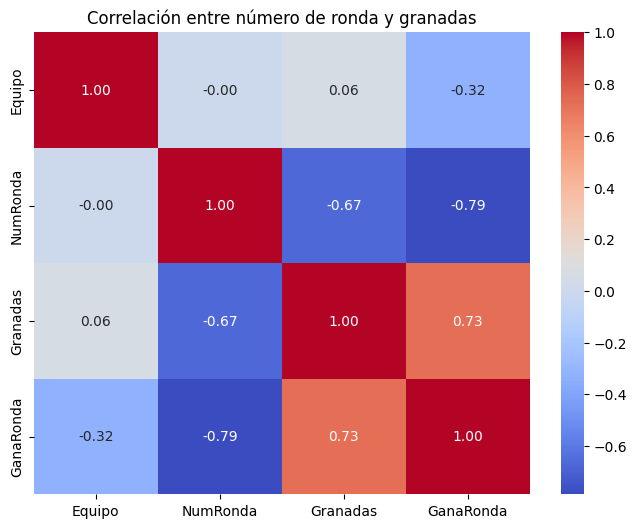

In [ ]:
granadas_gana = datos.groupby(['NumRonda', 'Equipo']).agg({
    'Equipo':'first',
    'NumRonda':'first',
    'Granadas': 'sum',
    'GanaRonda':'sum'
})

correlacion_granadas_win = granadas_gana.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_granadas_win, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre número de ronda y granadas')
plt.show()

* De acuerdo con lo observado, se puede concluir que, a medida que más se usan granadas, es más probable que se ganen las partidas.

### **De acuerdo con lo gastado en su equipamiento ¿Tiene más posibilidades de sobrevivir?**

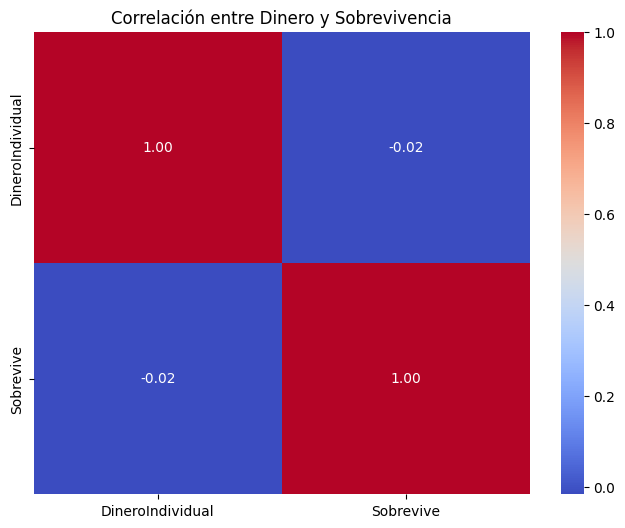

In [ ]:
equipamento = datos_considerar.groupby('DineroIndividual').agg({
    'DineroIndividual':'first',
    'Sobrevive':'sum'
})
correlacion_equipo = equipamento.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_equipo, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Dinero y Sobrevivencia')
plt.show()

* De acuerdo con el Heatmap, la cantidad de dinero gastado no influye en si un jugador sobrevive o no.

### **¿ Afecta el uso de granadas no letales y del valor de su equipo en la cantidad de muertes que el jugador realiza?**

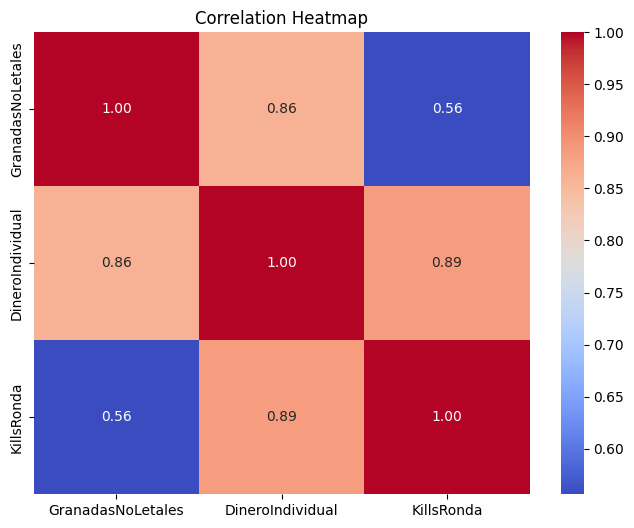

In [ ]:
granadas_valor = datos_considerar.groupby('KillsRonda').agg({
    'GranadasNoLetales':'mean',
    'DineroIndividual':'mean',
    'KillsRonda':'first'
})

corr_g_v = granadas_valor.corr()
# Gráfico de Correlación entre todas las filas numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(corr_g_v, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

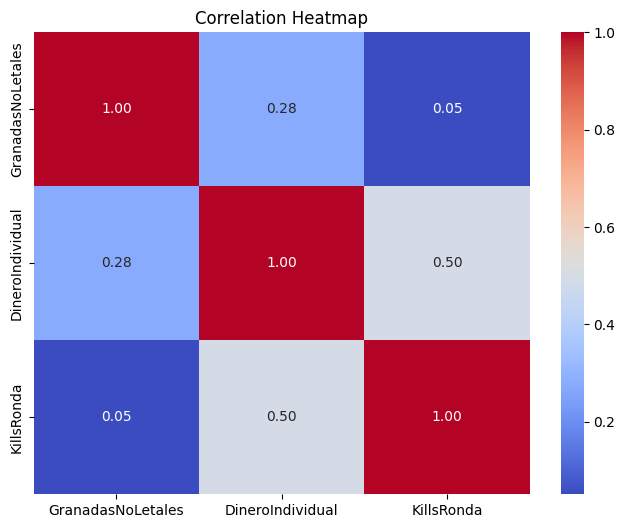

In [ ]:
granadas_valor = datos_considerar.groupby('DineroIndividual').agg({
    'GranadasNoLetales':'mean',
    'DineroIndividual':'first',
    'KillsRonda':'mean'
})

corr_g_v = granadas_valor.corr()
# Gráfico de Correlación entre todas las filas numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(corr_g_v, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

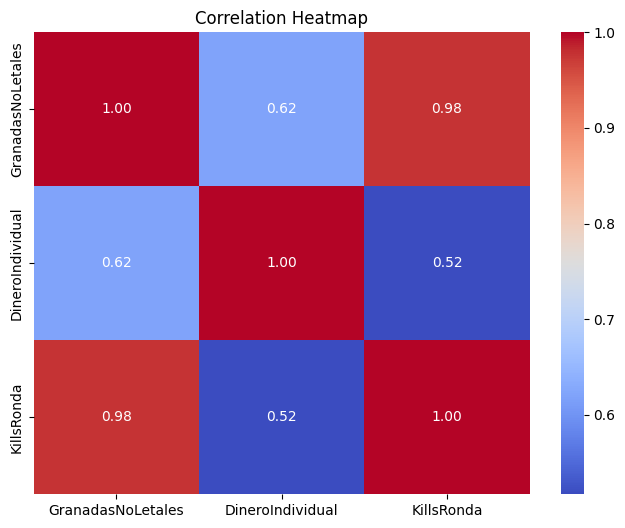

In [ ]:
granadas_valor = datos_considerar.groupby('GranadasNoLetales').agg({
    'GranadasNoLetales':'first',
    'DineroIndividual':'mean',
    'KillsRonda':'mean'
})

corr_g_v = granadas_valor.corr()
# Gráfico de Correlación entre todas las filas numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(corr_g_v, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

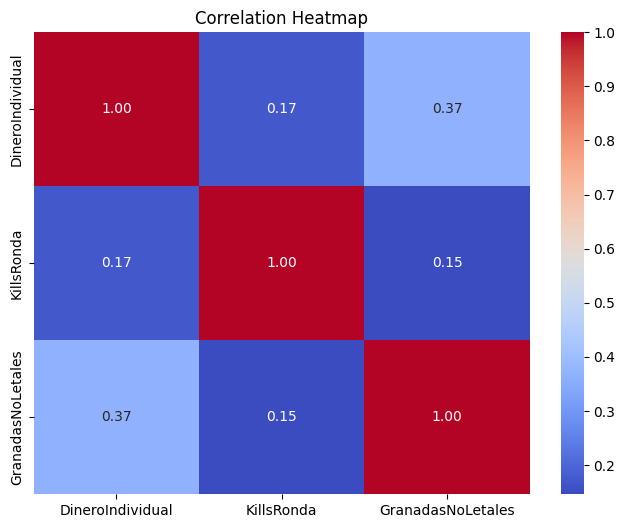

In [ ]:
granadas_valor = datos_considerar[['DineroIndividual','KillsRonda','GranadasNoLetales']]

corr_g_v = granadas_valor.corr()
# Gráfico de Correlación entre todas las filas numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(corr_g_v, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* De acuerdo con lo observado, se puede concluir que, dependiendo de la agrupación, los datos se comportarán de manera diferente. No obstante, si se toman los datos como tal, no hay una relación significativa entre las variables.

### **GRAFICANDO**

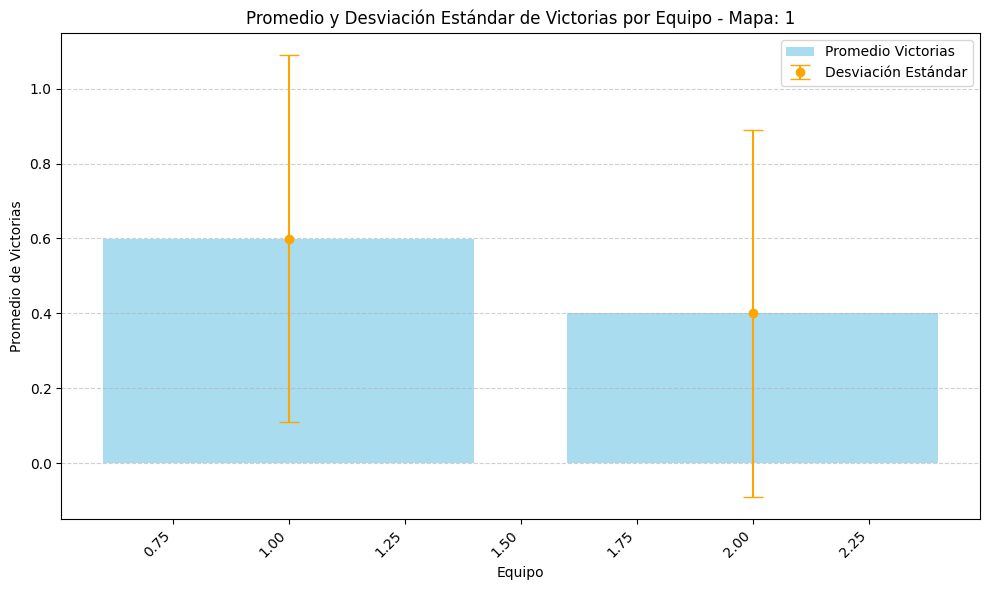

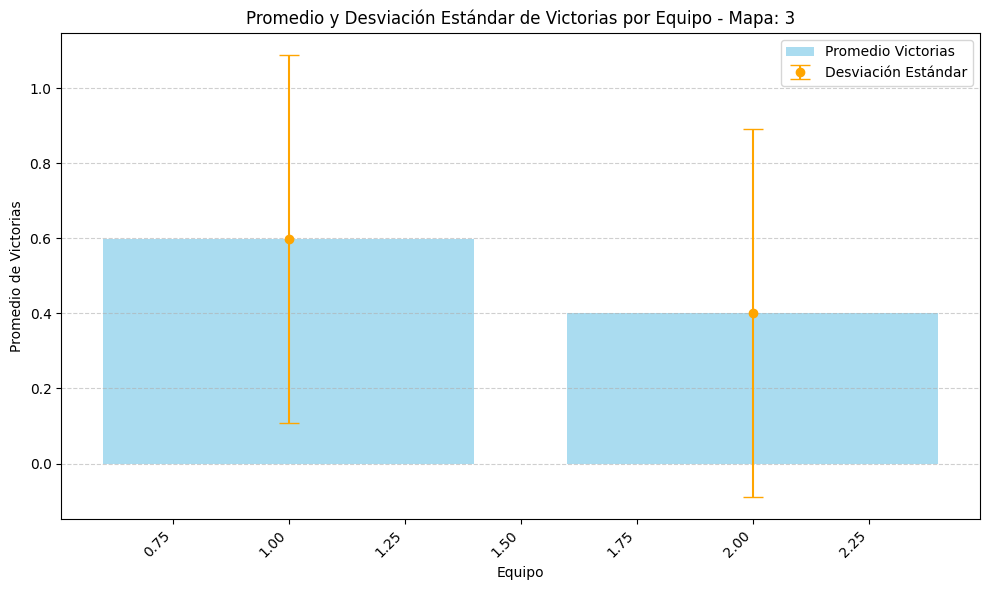

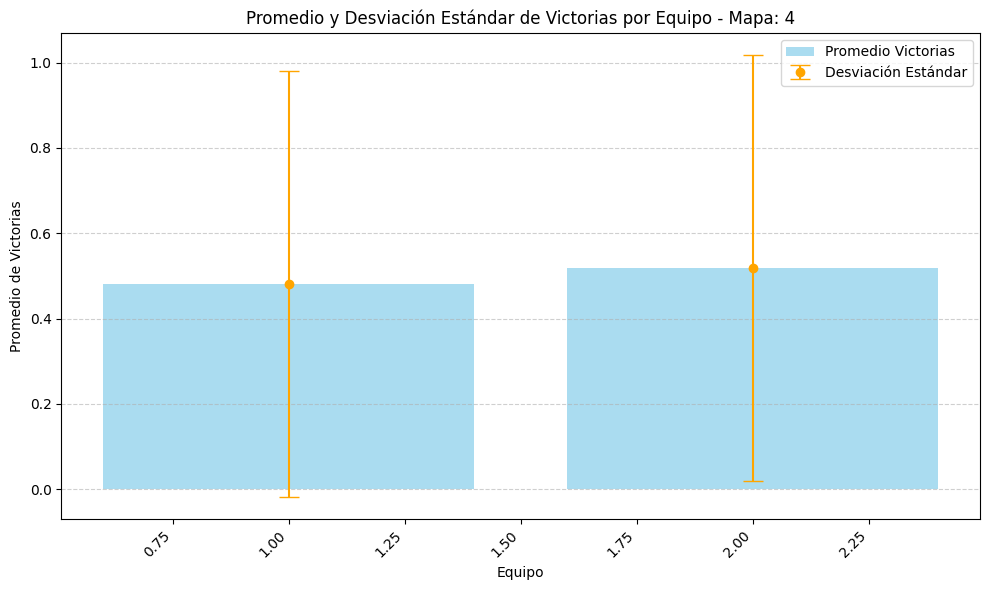

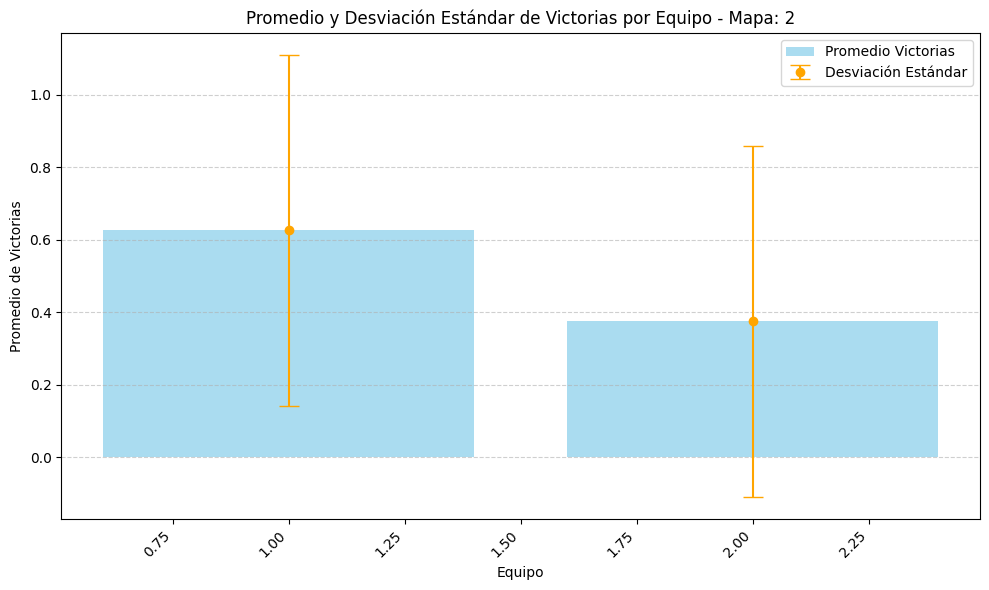

In [ ]:
# Calcular el promedio de victorias por mapa de cada equipo
promedio_victorias_por_mapa = datos_considerar.groupby(['Equipo', 'Mapa'])['GanaRonda'].mean().unstack()

# Calcular la desviación estándar por mapa de cada equipo
desviacion_estandar_por_mapa = datos_considerar.groupby(['Equipo', 'Mapa'])['GanaRonda'].std().unstack()

# Obtener la lista de mapas únicos
mapas = datos_considerar['Mapa'].unique()

# Crear un gráfico de barras separado para cada mapa
for mapa in mapas:
    # Filtrar los datos para el mapa actual
    datos_mapa = promedio_victorias_por_mapa.loc[:, mapa]
    std_mapa = desviacion_estandar_por_mapa.loc[:, mapa]

    # Crear un gráfico de barras con barras de error para mostrar el promedio y la desviación estándar
    plt.figure(figsize=(10, 6))

    # Barras de promedio
    plt.bar(datos_mapa.index, datos_mapa, color='skyblue', label='Promedio Victorias', alpha=0.7)

    # Barras de error
    plt.errorbar(datos_mapa.index, datos_mapa, yerr=std_mapa, fmt='o', color='orange', label='Desviación Estándar', capsize=7)

    # Etiquetas y título
    plt.xlabel('Equipo')
    plt.ylabel('Promedio de Victorias')
    plt.title(f'Promedio y Desviación Estándar de Victorias por Equipo - Mapa: {mapa}')
    plt.legend()

    # Ajustes de diseño
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Mostrar gráfico
    plt.show()


Resumen:

Se observa que el equipo que más gana en 3 de los 4 mapas son los Terroristas el unico donde el otro equipo es favorecido es de_dust2

In [ ]:
# Agrupar los datos por equipo y mapa
grupo_equipo_mapa = datos_considerar.groupby(['Equipo', 'Mapa'])

# Calcular la cantidad total de rondas jugadas por equipo y mapa
total_rondas = grupo_equipo_mapa.size()

# Calcular la cantidad de rondas ganadas por equipo y mapa
rondas_ganadas = grupo_equipo_mapa['GanaRonda'].sum()

# Calcular el porcentaje de victorias de cada equipo por mapa
porcentaje_victorias_por_mapa = (rondas_ganadas / total_rondas) * 100

# Mostrar el resultado
print(porcentaje_victorias_por_mapa)


Equipo  Mapa
1       1       59.985760
        2       62.552127
        3       59.912377
        4       48.150134
2       1       40.014240
        2       37.447873
        3       40.087623
        4       51.849866
dtype: float64


In [ ]:
# Filtrar los datos para incluir solo las rondas del 1 al 31
datos_rondas_1_al_31 = datos_considerar[datos_considerar['NumRonda'].between(1, 31)]

# Agrupar por equipo y número de ronda, y calcular el promedio del dinero del equipo por ronda del 1 al 31
promedio_dinero_equipo_por_ronda = datos_rondas_1_al_31.groupby(['Equipo', 'NumRonda'])['DineroEquipo'].mean()

# Mostrar el resultado
print(promedio_dinero_equipo_por_ronda)


Equipo  NumRonda
1       1            6996.273292
        2           12043.788820
        3           15832.763975
        4           17910.714286
        5           19207.919255
                        ...     
2       27          25920.202020
        28          25763.571429
        29          25602.127660
        30          26582.500000
        31          17500.000000
Name: DineroEquipo, Length: 62, dtype: float64


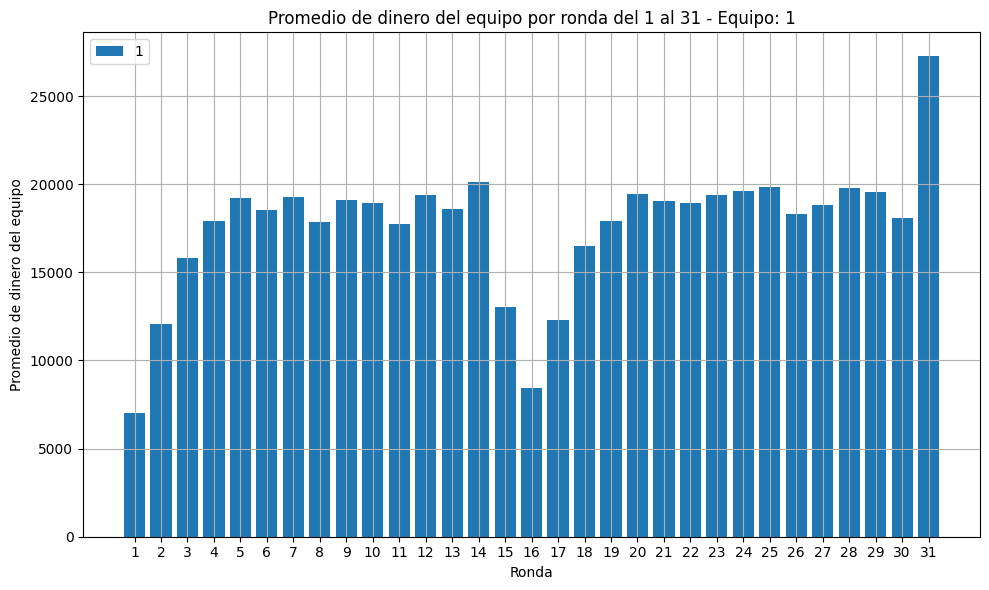

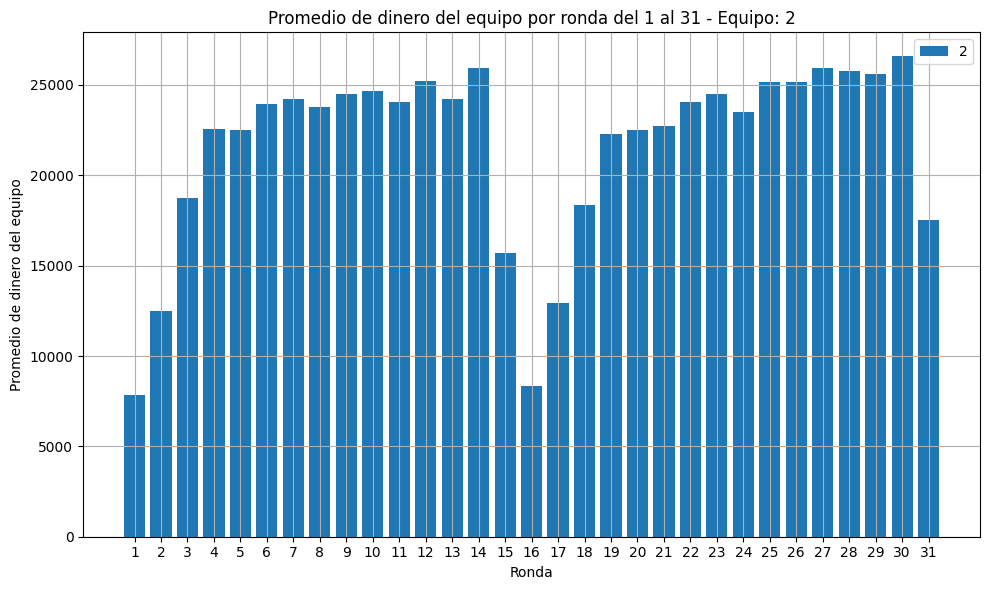

In [ ]:
# Filtrar los datos para incluir solo las rondas del 1 al 31
datos_rondas_1_al_31 = datos_considerar[datos_considerar['NumRonda'].between(1, 31)]

# Obtener la lista de equipos únicos
equipos = datos_rondas_1_al_31['Equipo'].unique()

# Crear un gráfico de barras apiladas para cada equipo
for equipo in equipos:
    # Filtrar los datos para el equipo actual
    datos_equipo = datos_rondas_1_al_31[datos_rondas_1_al_31['Equipo'] == equipo]

    # Calcular el promedio del dinero del equipo por ronda del 1 al 31
    promedio_dinero_equipo_por_ronda = datos_equipo.groupby('NumRonda')['DineroEquipo'].mean()

    # Crear el gráfico de barras apiladas
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(1, 32), promedio_dinero_equipo_por_ronda, label=equipo)

    # Configurar el eje x
    plt.xticks(np.arange(1, 32), np.arange(1, 32))
    plt.xlabel('Ronda')

    # Configurar el eje y
    plt.ylabel('Promedio de dinero del equipo')

    # Título del gráfico
    plt.title(f'Promedio de dinero del equipo por ronda del 1 al 31 - Equipo: {equipo}')

    # Leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Resumen:
Se puede observar que los Anti-Terroristas tienen más dinero a traves de las rondas de las partidas pero eso no afecta a su cantidad de victorias.

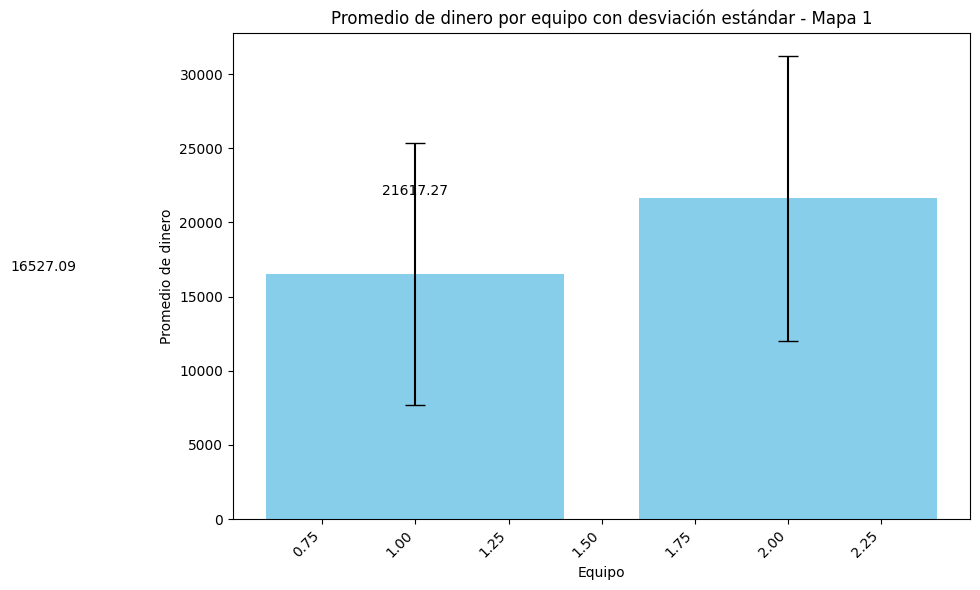

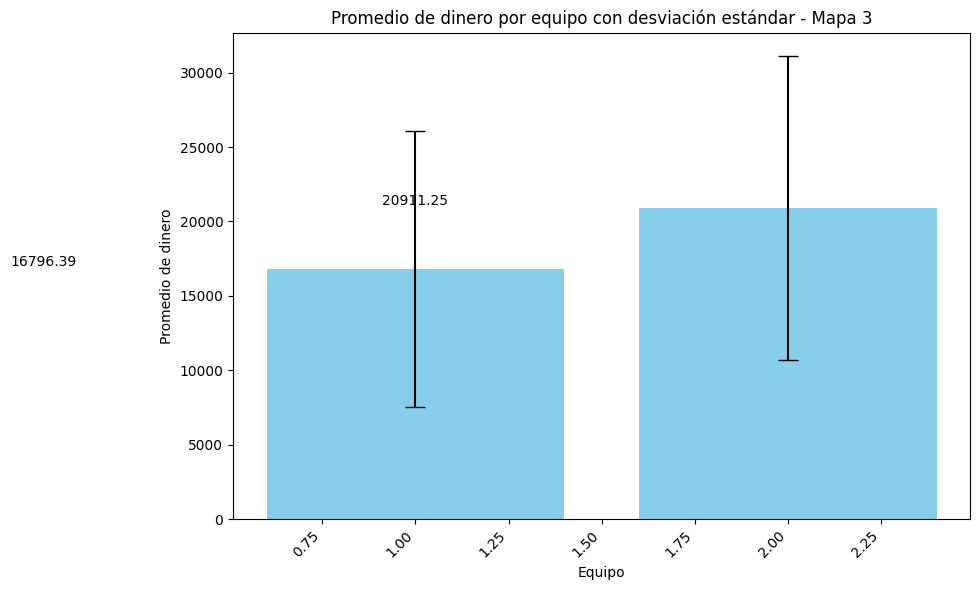

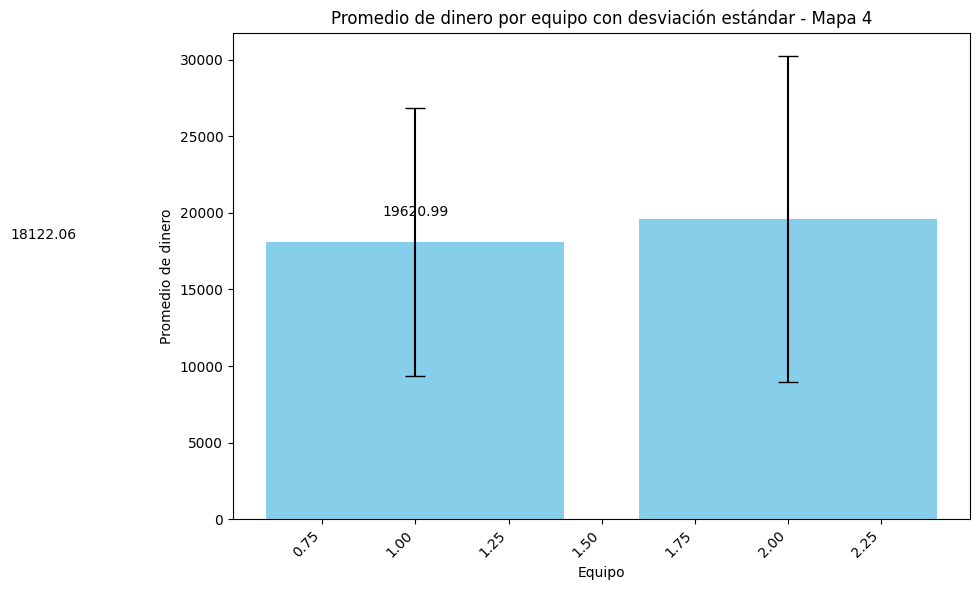

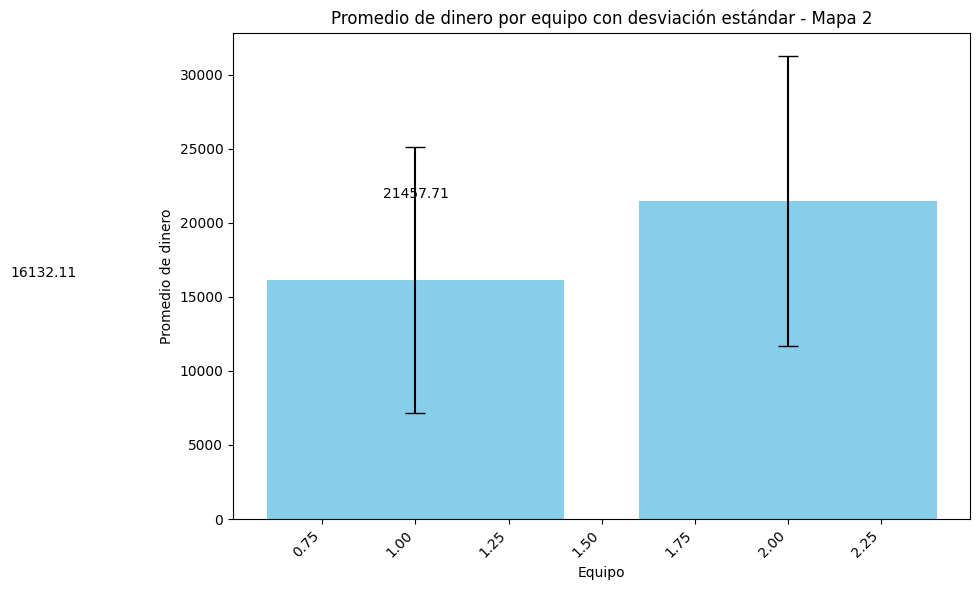

In [ ]:
# Obtener la lista de mapas únicos
mapas = datos_considerar['Mapa'].unique()

# Crear un gráfico de barras separado para cada mapa
for mapa in mapas:
    # Filtrar los datos para el mapa actual
    datos_mapa = datos_considerar[datos_considerar['Mapa'] == mapa]

    # Calcular el promedio de dinero por equipo para el mapa actual
    promedio_dinero_por_equipo = datos_mapa.groupby('Equipo')['DineroEquipo'].mean()

    # Calcular la desviación estándar de dinero por equipo para el mapa actual
    desviacion_estandar_por_equipo = datos_mapa.groupby('Equipo')['DineroEquipo'].std()

    # Crear el gráfico de barras con barras de error para la desviación estándar
    plt.figure(figsize=(10, 6))
    plt.bar(promedio_dinero_por_equipo.index, promedio_dinero_por_equipo, yerr=desviacion_estandar_por_equipo, capsize=7, color='skyblue')

    # Agregar puntos en el medio de las barras para indicar el promedio
    for i, value in enumerate(promedio_dinero_por_equipo):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    plt.title(f'Promedio de dinero por equipo con desviación estándar - Mapa {mapa}')
    plt.xlabel('Equipo')
    plt.ylabel('Promedio de dinero')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### **Resumen:**
# Se puede observar que en todos los mapas los Anti-Terroristas tienen generalmente más oro que los Terroristas pero esto no termina afectando sus posibilidades de ganar.

Resumen:
Se observa que el equipo que más gana en 3 de los 4 mapas son los Terroristas el unico donde el otro equipo es favorecido es de_dust2

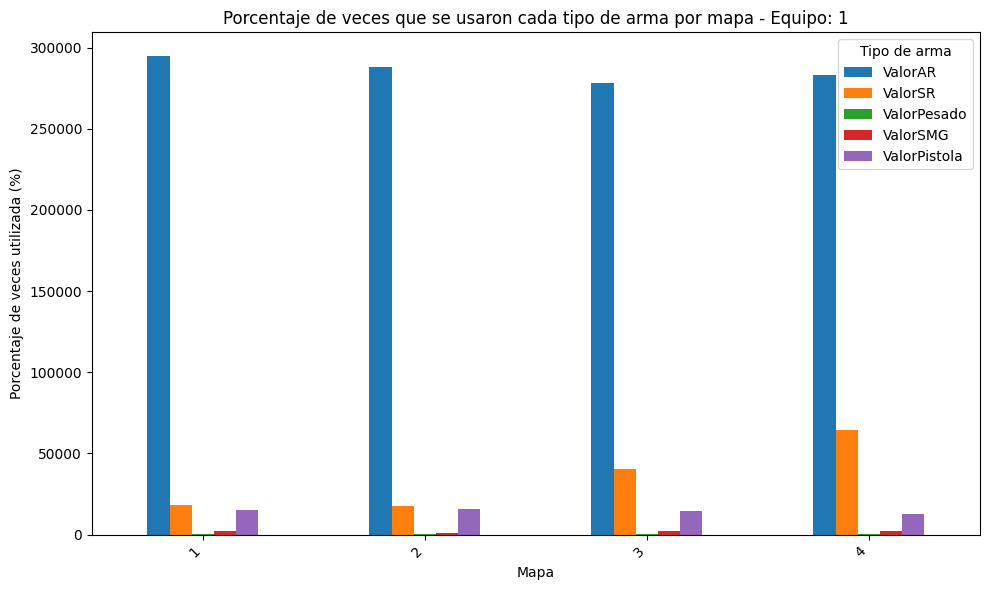

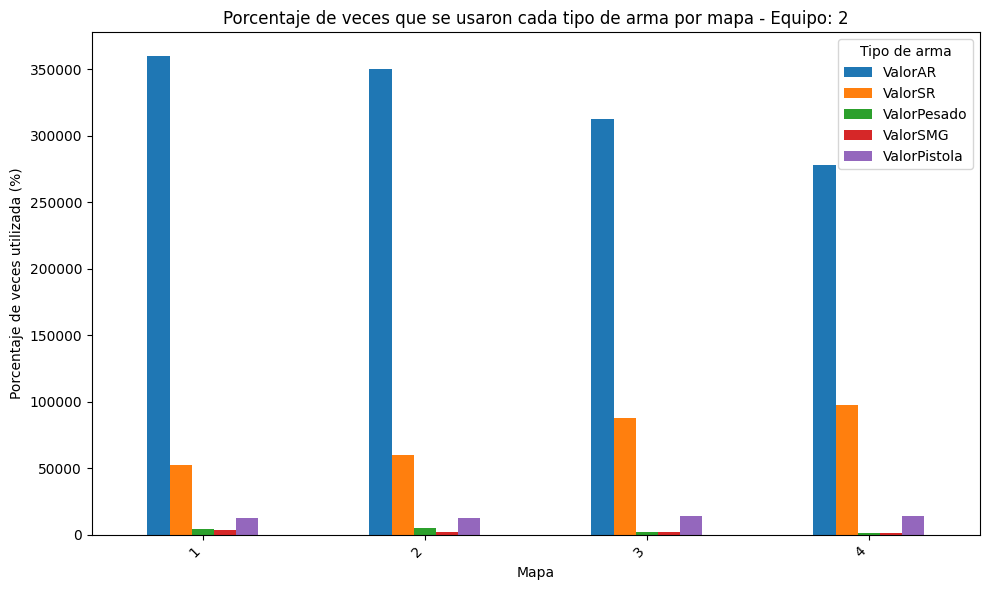

In [ ]:
# Obtener la lista de equipos únicos
equipos = datos_considerar['Equipo'].unique()

# Crear un gráfico de barras para cada equipo mostrando el porcentaje de veces que se usaron cada tipo de arma por mapa
for equipo in equipos:
    # Filtrar los datos para el equipo actual
    datos_equipo = datos_considerar[datos_considerar['Equipo'] == equipo]

    # Calcular el total de rondas jugadas por mapa para el equipo actual
    total_rondas_por_mapa = datos_equipo.groupby('Mapa')['Mapa'].count()

    # Calcular la cantidad de veces que se usaron cada tipo de arma por mapa para el equipo actual
    armas_por_mapa_equipo = datos_equipo[['Mapa', 'ValorAR', 'ValorSR', 'ValorPesado', 'ValorSMG', 'ValorPistola']].groupby('Mapa').sum()

    # Convertir los valores en porcentajes
    armas_por_mapa_equipo_porcentaje = (armas_por_mapa_equipo.div(total_rondas_por_mapa, axis=0) * 100).round(2)

    # Crear un gráfico de barras para el equipo actual
    armas_por_mapa_equipo_porcentaje.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Porcentaje de veces que se usaron cada tipo de arma por mapa - Equipo: {equipo}')
    plt.xlabel('Mapa')
    plt.ylabel('Porcentaje de veces utilizada (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Tipo de arma')
    plt.tight_layout()
    plt.show()


### **Resumen:**
# Aqui se puede observar la distribución de armas según el mapa, podemos observar que claramente el rifle de asalto es el arma más popular en todos los mapas y por ambos equipos, por lo que se puede validar lo observado en las correlaciones del mapa de calor.

In [ ]:
# Calcular el promedio de victorias por mapa de cada equipo
promedio_victorias_por_mapa = datos_considerar.groupby(['Equipo', 'Mapa'])['GanaRonda'].mean()

# Mostrar el resultado
print(promedio_victorias_por_mapa)


Equipo  Mapa
1       1       0.599858
        2       0.625521
        3       0.599124
        4       0.481501
2       1       0.400142
        2       0.374479
        3       0.400876
        4       0.518499
Name: GanaRonda, dtype: float64


In [ ]:
dfco =  df.copy()

In [ ]:
# Obtener los índices de las últimas RoundId de cada MatchId
indices_ultima_round = df.groupby(['MatchId', 'Team'])['RoundId'].idxmax()

# Filtrar el DataFrame original usando los índices de las últimas RoundId
ultimos_matchheadshots = df.loc[indices_ultima_round, ['Team', 'Map','MatchHeadshots']]

um = ultimos_matchheadshots.groupby(['Map', 'Team'])
um.describe()

MatchHeadshots                                 \
                                     count      mean       std  min   25%   
Map        Team                                                             
de_dust2   CounterTerrorist           79.0  7.594937  3.649794  0.0  5.00   
           Terrorist                  79.0  8.025316  3.500823  1.0  5.00   
de_inferno CounterTerrorist          115.0  7.269565  3.179765  1.0  5.00   
           Terrorist                 115.0  7.234783  3.721277  1.0  5.00   
de_mirage  CounterTerrorist           78.0  6.884615  3.345789  1.0  5.00   
           Terrorist                  78.0  7.500000  3.515273  0.0  5.00   
de_nuke    CounterTerrorist           50.0  7.160000  3.672068  0.0  5.00   
           Terrorist                  50.0  7.300000  3.660322  0.0  4.25   

                                              
                             50%   75%   max  
Map        Team                               
de_dust2   CounterTerrorist  7.0   9.5  19.0  
           Terrorist         8.0  10.0  18.0  
de_inferno CounterTerrorist  7.0   9.0  19.0  
           Terrorist         7.0   9.0  19.0  
de_mirage  CounterTerrorist  7.0   9.0  16.0  
           Terrorist         7.0  10.0  19.0  
de_nuke    CounterTerrorist  7.0  10.0  17.0  
           Terrorist         7.5  10.0  15.0

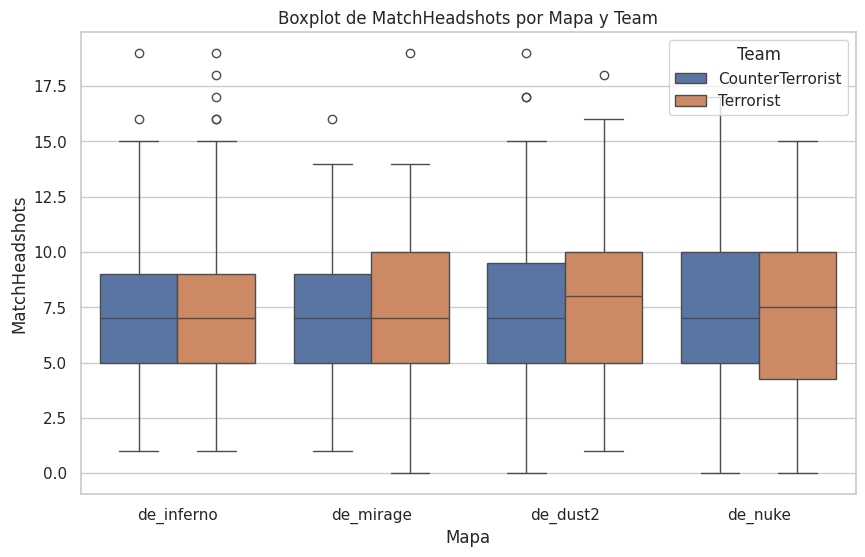

In [ ]:
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=ultimos_matchheadshots, x="Map", y="MatchHeadshots", hue="Team")
plt.title("Boxplot de MatchHeadshots por Mapa y Team")
plt.xlabel("Mapa")
plt.ylabel("MatchHeadshots")
plt.legend(title="Team")
plt.show()

In [ ]:
# Crear una variable binaria para headshots (alto si está por encima de la mediana, bajo si está por debajo)
median_headshots = df['MatchHeadshots'].median()


df['Headshots_High'] = (df['MatchHeadshots'] > median_headshots).astype(int)
#Elimina columnas que no se usan
df_copiaaa = df.drop(['TimeAlive', 'TravelledDistance', 'FirstKillTime','InternalTeamId','MatchId','RoundId','RoundWinner','RoundWinner','Survived',
                      'RLethalGrenadesThrown','RLethalGrenadesThrown','PrimaryAssaultRifle','PrimarySniperRifle','TeamStartingEquipmentValue','MatchFlankKills',
                      'MatchWinner', 'RNonLethalGrenadesThrown', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', # Added missing comma here
               ], axis=1)


#one-hot encoding
categorical_columns = ['Team', 'Map']
df_copiaaa = pd.get_dummies(df_copiaaa, columns=categorical_columns, drop_first=True)



### **Resumen:**
# Los datos muestran el promedio de headshots y su desviación estándar para equipos CounterTerrorist y Terrorist en diferentes mapas de juego como de_dust2, de_inferno, de_mirage y de_nuke. Se observa variabilidad en los promedios de headshots entre equipos y mapas, con algunos mapas mostrando diferencias más pronunciadas entre los equipos.

## Fase 4: Modeling

###**Regresión**

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

#### **Regresión lineal**

##### Creación de DataFrames

In [ ]:
sin_bajos = pd.DataFrame()

sin_bajos['DineroEquipo'] = datos_considerar['DineroEquipo']
sin_bajos['Partida'] = datos_considerar['NumPartida']
sin_bajos['Ronda'] = datos_considerar['NumRonda']
sin_bajos['Equipo'] = datos_considerar['NumInterno']
sin_bajos['Granadas'] = (datos_considerar['GranadasLetales']+datos_considerar['GranadasNoLetales'])
sin_bajos['Kills'] = datos_considerar['KillsRonda']
sin_bajos['Ganada'] = datos_considerar['GanaPartida']
sin_bajos['GanaRonda'] = datos_considerar['GanaRonda']

sin_bajos_ag = sin_bajos.groupby(['Partida','Ronda', 'Equipo']).agg({
    'Partida':'first',
    'DineroEquipo':'first',
    'Ronda':'first',
    'Equipo':'first',
    'Granadas':'sum',
    'Kills':'sum',
    'GanaRonda':'first'
})

sin_bajos_ag

Partida  DineroEquipo  Ronda  Equipo  Granadas  Kills  \
Partida Ronda Equipo                                                          
4       1     1             4          4400      1       1         6      0   
              2             4          3750      1       2         2      5   
        2     1             4          1300      2       1         1      0   
              2             4         19950      2       2         1      5   
        3     1             4          2000      3       1         5      0   
...                       ...           ...    ...     ...       ...    ...   
510     28    2           510          1000     28       2         0      0   
        29    1           510         28800     29       1        18      5   
              2           510         22300     29       2        11      0   
        30    1           510         29000     30       1        10      5   
              2           510         15850     30       2         0      2   

                      GanaRonda  
Partida Ronda Equipo             
4       1     1               0  
              2               1  
        2     1               1  
              2               0  
        3     1               1  
...                         ...  
510     28    2               1  
        29    1               0  
              2               1  
        30    1               0  
              2               1  

[15398 rows x 7 columns]

In [ ]:
mapa_kills = pd.DataFrame()

mapa_kills['Kills'] = datos_considerar['KillsRonda']
mapa_kills['Mapa'] = datos_considerar['Mapa']
mapa_kills['Match'] = datos_considerar['NumPartida']

mapa_kills_g = mapa_kills.groupby('Match').agg({
    'Mapa':'first',
    'Kills':'sum'
})

mapa_kills_g

,Mapa,Kills
Match,,
4,1,151
9,1,167
10,3,163
12,1,146
13,4,157
...,...,...
504,4,189
505,3,144
506,1,184


In [ ]:
dinero_sobrevive = pd.DataFrame()

dinero_sobrevive['Dinero'] = datos_considerar['DineroIndividual']
dinero_sobrevive['Sobrevive'] = datos_considerar['Sobrevive']

dinero_sobrevive

,Dinero,Sobrevive
0,750,0
1,800,0
2,1000,0
3,850,0
4,1000,1
...,...,...
79102,3050,0
79103,3200,0
79104,3200,0
79105,3200,0


##### Funciones y separación en entrenamiento, validación y testeo

In [ ]:
import copy

def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [ ]:
tr, va, te = np.split(sin_bajos_ag.sample(frac=1), [int(0.6*len(sin_bajos_ag)), int(0.8*len(sin_bajos_ag))])
tr1, va1, te1 = np.split(mapa_kills_g.sample(frac=1), [int(0.6*len(mapa_kills_g)), int(0.8*len(mapa_kills_g))])
tr2, va2, te2 = np.split(dinero_sobrevive.sample(frac=1), [int(0.6*len(dinero_sobrevive)), int(0.8*len(dinero_sobrevive))])

In [ ]:
_, X_train_temp, y_train_temp = get_xy(tr, "Granadas", x_labels=["DineroEquipo"])
_, X_val_temp, y_val_temp = get_xy(va, "Granadas", x_labels=["DineroEquipo"])
_, X_test_temp, y_test_temp = get_xy(te, "Granadas", x_labels=["DineroEquipo"])

_1, X_train_temp1, y_train_temp1 = get_xy(tr1, "Mapa", x_labels=["Kills"])
_1, X_val_temp1, y_val_temp1 = get_xy(va1, "Mapa", x_labels=["Kills"])
_1, X_test_temp1, y_test_temp1 = get_xy(te1, "Mapa", x_labels=["Kills"])

_2, X_train_temp2, y_train_temp2 = get_xy(tr2, "Sobrevive", x_labels=["Dinero"])
_2, X_val_temp2, y_val_temp2 = get_xy(va2, "Sobrevive", x_labels=["Dinero"])
_2, X_test_temp2, y_test_temp2 = get_xy(te2, "Sobrevive", x_labels=["Dinero"])

##### Modelando

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

nps = [[X_train_temp, y_train_temp,"Granadas x DineroEquipo"],[X_train_temp1, y_train_temp1,"Mapa x Kills"],[X_train_temp2, y_train_temp2,"Dinero x Sobrevive"]]

for nn in nps:
  model = LinearRegression()
  model.fit(nn[0], nn[1])
  y_pred = model.predict(nn[0])

  # Assuming y_true are the true values and y_pred are the predicted values

  # Mean Squared Error
  mse = mean_squared_error(nn[1], y_pred)

  # Mean Absolute Error
  mae = mean_absolute_error(nn[1], y_pred)

  # R^2 Score
  r2 = r2_score(nn[1], y_pred)

  # Root Mean Squared Error
  rmse = mean_squared_error(nn[1], y_pred, squared=False)

  # Print all the metrics
  print("----------------------------------------")
  print(f"Mean Squared Error de {nn[2]}: {mse}\n")
  print(f"Mean Absolute Error de {nn[2]}: {mae}\n")
  print(f"R^2 de {nn[2]}: {r2}\n")
  print(f"Root Mean Squared Error de {nn[2]}: {rmse}\n")

  print(f"Puntaje del modelo: {model.score(nn[0], nn[1])}\n")

----------------------------------------
Mean Squared Error de Granadas x DineroEquipo: 15.63438422660575

Mean Absolute Error de Granadas x DineroEquipo: 3.1783441528307135

R^2 de Granadas x DineroEquipo: 0.4740115003160805

Root Mean Squared Error de Granadas x DineroEquipo: 3.9540339182416924

Puntaje del modelo: 0.4740115003160805

----------------------------------------
Mean Squared Error de Mapa x Kills: 1.4190290797437681

Mean Absolute Error de Mapa x Kills: 1.0904771008171736

R^2 de Mapa x Kills: 0.0035175667111149167

Root Mean Squared Error de Mapa x Kills: 1.1912300700300376

Puntaje del modelo: 0.0035175667111149167

----------------------------------------
Mean Squared Error de Dinero x Sobrevive: 0.23288607292392055

Mean Absolute Error de Dinero x Sobrevive: 0.4657721458478411

R^2 de Dinero x Sobrevive: 0.031886606755736624

Root Mean Squared Error de Dinero x Sobrevive: 0.4825827109666493

Puntaje del modelo: 0.031886606755736624



Como conclusión, se puede rescatar que en general, los tres modelos tuvieron un puntaje muy bajo como para realizar buenas predicciones. Dentro de los tres, el que mejor se adapta es el de las granadas con el dinero que posee el equipo, con un 48,89%. Lo anteriior se puede deber a que, en el primer modelo, se hace una regresión común y corriente, mientras que en las otras se espera una clasificación de 0 o 1, o bien del 1 al 4. No obstante, un 48% tampoco es muy aceptable.

#### **Árbol de decisiones REGRESIÓN**

In [ ]:
#COPIA DEL DF ORIGINAL
df_copia2 = df.copy()

In [ ]:
df_copia2.head(15)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
5,605,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,850,3750,0,0,0,0
6,606,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,400,3750,0,0,0,0
7,607,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,1,0,0,800,3750,0,0,1,0
8,608,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,3,0,1,1,850,3750,3,1,0,1
9,609,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,2,0,2,0,850,3750,2,0,0,2


In [ ]:
# Obtener el nombre de la primera columna
primera_columna = df_copia2.columns[0]
# Lista de columnas a eliminar, incluyendo la primera columna
columnas_a_eliminar = [primera_columna, 'TimeAlive', 'TravelledDistance', 'FirstKillTime', 'AbnormalMatch',
                       'Map','Team', 'MatchId','RoundId','InternalTeamId']
# Eliminar las columnas especificadas
df_copia2 = df_copia2.drop(columnas_a_eliminar, axis=1)

In [ ]:
def str_to_bool(value):
    if value == 'True':
        return True
    elif value == 'False':
        return False
    else:
        return False  # Puedes ajustar esto dependiendo de cómo quieras manejar 'None'

# Aplicar la función a la columna RoundWinner y luego convertir a enteros
df_copia2['RoundWinner'] = df_copia2['RoundWinner'].apply(str_to_bool).astype(int)
df_copia2['MatchWinner'] = df_copia2['MatchWinner'].map({True: 1, False: 0})
df_copia2['Survived'] = df_copia2['Survived'].map({True: 1, False: 0})

In [ ]:
# separar x e y
X = df_copia2.drop('MatchWinner', axis=1)  # Todas las columnas excepto 'MatchWinner'
y = df_copia2['MatchWinner'].fillna(0)  # Solo la columna 'MatchWinner'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X_transformed = np.array(ct.fit_transform(X))
for column in X_transformed.T:
    print(column)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
rg = DecisionTreeRegressor()
rg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_predict = rg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

0.4085448939044504

In [ ]:
y_predict_train = rg.predict(X_train)
mean_absolute_error(y_train, y_predict_train)

0.007560634746376065

La diferencia entre el MAE en el conjunto training (0.00756) y el conjunto test (0.40916) sugiere que el modelo está en overfitting


```
# This is formatted as code
```



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.05]}
rg1 = DecisionTreeRegressor()
rg1 = GridSearchCV(rg1, parameters)

In [ ]:
rg1.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.05],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [ ]:
rg1.best_params_


{'ccp_alpha': 0.0,
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [ ]:
rg1.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

In [ ]:
y_predict =rg1.predict(X_test)
mean_absolute_error(y_test, y_predict)

0.43312202479924633

In [ ]:
y_predict =rg1.predict(X_train)
mean_absolute_error(y_train, y_predict_train)

0.007560634746376065

Conlusiones
El error absoluto medio en el conjunto de entrenamiento es extremadamente bajo (0.0076). Esto indica que el modelo está cayendo en overfitting
El error absoluto medio en el conjunto de prueba es significativamente más alto (0.433) en comparación con el conjunto de entrenamiento. Esta gran discrepancia entre el error de entrenamiento y el error de prueba sugiere que el modelo puede estar sobreajustado.



Los valores mean_absolute_error encontrados en el modelo de arbol de decisiones antes y despues del Gridsearch indican que el modelo esta ajustado, quizas mucho y entra en el overfitting, pero tambien al tener un numero tan bajo como resultado (0.4) muestra que quizas no es tan buen modelo para el dataset **utilizado**

#### **Random Forest**

PCA

Varianza explicada por cada componente principal: [0.66310635 0.2365776 ]


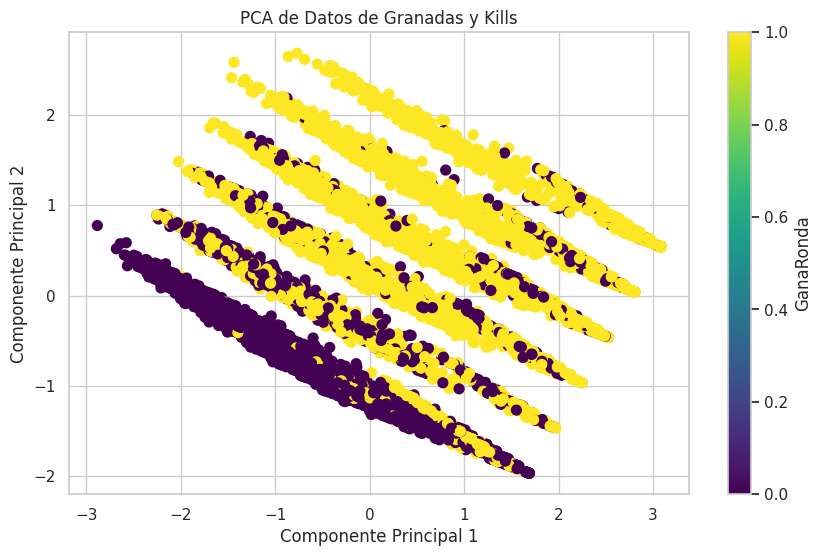

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



X = sin_bajos_ag[['DineroEquipo', 'Granadas', 'Kills']]
y = sin_bajos_ag['GanaRonda']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['GanaRonda'] = y.values

# Ver la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

# Graficar los componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['GanaRonda'], cmap='viridis', s=50)
plt.title('PCA de Datos de Granadas y Kills')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='GanaRonda')
plt.grid(True)
plt.show()

Grid search

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


# Dividir los datos en conjunto de entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Definir el modelo
rf = RandomForestRegressor()

# Definir los hiperparámetros para la búsqueda
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Aplicar RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_pca, y_train_pca)

# Mostrar los mejores parámetros
print("Mejores parámetros:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mejores parámetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 54}


Métricas

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Usar el modelo encontrado
best_rf = random_search.best_estimator_
y_pred_pca = best_rf.predict(X_test_pca)

# Calcular las métricas de regresión
mse = mean_squared_error(y_test_pca, y_pred_pca)
r2 = r2_score(y_test_pca, y_pred_pca)

print("Después de PCA:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Después de PCA:
Mean Squared Error: 0.08741377986343407
R^2 Score: 0.6503159810405647


### Clasificación

#### **Regresion logística**

In [ ]:
sin_bajos = pd.DataFrame()

sin_bajos['DineroEquipo'] = datos_considerar['DineroEquipo']
sin_bajos['Partida'] = datos_considerar['NumPartida']
sin_bajos['Ronda'] = datos_considerar['NumRonda']
sin_bajos['Equipo'] = datos_considerar['NumInterno']
sin_bajos['Granadas'] = (datos_considerar['GranadasLetales']+datos_considerar['GranadasNoLetales'])
sin_bajos['Kills'] = datos_considerar['KillsRonda']
sin_bajos['Ganada'] = datos_considerar['GanaPartida']
sin_bajos['GanaRonda'] = datos_considerar['GanaRonda']

sin_bajos_ag = sin_bajos.groupby(['Partida','Ronda', 'Equipo']).agg({
    'Partida':'first',
    'DineroEquipo':'first',
    'Ronda':'first',
    'Equipo':'first',
    'Granadas':'sum',
    'Kills':'sum',
    'GanaRonda':'first'
})

sin_bajos_ag

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preparar los datos
X = sin_bajos_ag[['DineroEquipo', 'Granadas', 'Kills']]
y = sin_bajos_ag['GanaRonda']

# Escalar los dato
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = logistic_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)






Accuracy: 0.8431818181818181

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1554
           1       0.86      0.81      0.84      1526

    accuracy                           0.84      3080
   macro avg       0.84      0.84      0.84      3080
weighted avg       0.84      0.84      0.84      3080


Confusion Matrix:
[[1360  194]
 [ 289 1237]]


Acurrancy

In [ ]:
print("Accuracy:", accuracy)


Reporte de Clasificación

In [ ]:
print(classification_report(y_test, y_pred))

Matriz de confusión

In [ ]:
print(confusion_matrix(y_test, y_pred))

 Reporte de clasificación

#### **Árbol de decisiones CLASIFICACIÓN**

In [ ]:
#COPIA DEL DF ORIGINAL
df_copia = df.copy()


Limpiando dataset




In [ ]:
# Obtener el nombre de la primera columna
primera_columna = df_copia.columns[0]
# Lista de columnas a eliminar, incluyendo la primera columna
columnas_a_eliminar = [primera_columna, 'TimeAlive', 'TravelledDistance', 'FirstKillTime', 'AbnormalMatch',
                       'Map','Team', 'MatchId','RoundId','InternalTeamId']
# Eliminar las columnas especificadas
df_copia = df_copia.drop(columnas_a_eliminar, axis=1)

Transformando datos

In [ ]:
def str_to_bool(value):
    if value == 'True':
        return True
    elif value == 'False':
        return False
    else:
        return False  # Puedes ajustar esto dependiendo de cómo quieras manejar 'None'

# Aplicar la función a la columna RoundWinner y luego convertir a enteros
df_copia['RoundWinner'] = df_copia['RoundWinner'].apply(str_to_bool).astype(int)
df_copia['MatchWinner'] = df_copia['MatchWinner'].map({True: 1, False: 0})
df_copia['Survived'] = df_copia['Survived'].map({True: 1, False: 0})

Separando X e Y

In [ ]:
# separar x e y
X = df_copia.drop('MatchWinner', axis=1)  # Todas las columnas excepto 'MatchWinner'
y = df_copia['MatchWinner'].fillna(0)  # Solo la columna 'MatchWinner'

Separacion test y train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = 0.2)

Creacion objeto de clasificador

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Fit modelo



In [ ]:
dtc.fit(X_train, y_train)

ValueError: could not convert string to float: 'de_dust2'

Predicción

In [ ]:
y_pred = dtc.predict(X_test)

Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[5238 3217]
 [3141 4236]]


Reporte de clasificación

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.62      0.62      8455
         1.0       0.57      0.57      0.57      7377

    accuracy                           0.60     15832
   macro avg       0.60      0.60      0.60     15832
weighted avg       0.60      0.60      0.60     15832



In [ ]:
dtc.feature_importances_

array([0.01702979, 0.01655166, 0.0241082 , 0.0617312 , 0.01541116,
       0.01437305, 0.00200383, 0.00261669, 0.00370202, 0.04096599,
       0.01711598, 0.02266332, 0.01130038, 0.12989981, 0.27164695,
       0.13178723, 0.06087682, 0.06215367, 0.09406223])

In [ ]:
features = pd.DataFrame(dtc.feature_importances_, index =  X.columns)

In [ ]:
features.head(35)

,0
RoundWinner,0.017030
Survived,0.016552
RLethalGrenadesThrown,0.024108
RNonLethalGrenadesThrown,0.061731
PrimaryAssaultRifle,0.015411
PrimarySniperRifle,0.014373
PrimaryHeavy,0.002004
PrimarySMG,0.002617
PrimaryPistol,0.003702
RoundKills,0.040966


Features relevantes

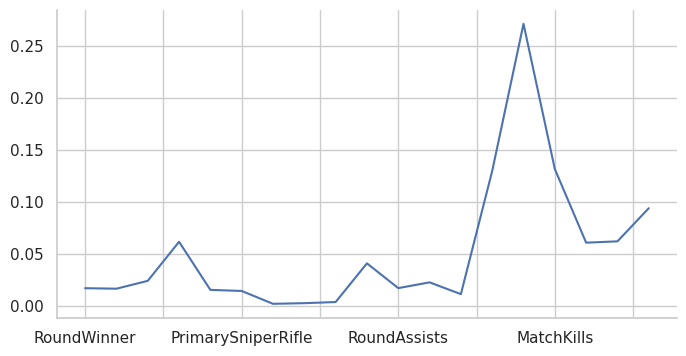

In [ ]:

from matplotlib import pyplot as plt
features[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

OPCION 2

In [ ]:
dtc2 = DecisionTreeClassifier (criterion = 'entropy', ccp_alpha = 0.01)


In [ ]:
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy')

In [ ]:
y_pred2 = dtc2.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred2))

[[5092 3363]
 [2724 4653]]


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.65      0.60      0.63      8455
         1.0       0.58      0.63      0.60      7377

    accuracy                           0.62     15832
   macro avg       0.62      0.62      0.62     15832
weighted avg       0.62      0.62      0.62     15832



In [ ]:
features2 = pd.DataFrame(dtc2.feature_importances_, index =  X.columns)

##### **Conclusión**

Ambas opciones muestran un bajo porcentaje de acierto lo que significa que el modelo de arbol no es la mejor manera de medir la posibilidad de ganar la partida tomando en cuenta los features seleccionados esto es debido a que el dato a considerar para seleccionar una clasificación es binario.




In [ ]:
features2.head(30)

,0
RoundWinner,0.000000
Survived,0.000000
RLethalGrenadesThrown,0.000000
RNonLethalGrenadesThrown,0.000000
PrimaryAssaultRifle,0.000000
PrimarySniperRifle,0.000000
PrimaryHeavy,0.000000
PrimarySMG,0.000000
PrimaryPistol,0.000000
RoundKills,0.000000


#### **kNN**

##### Creación de Dataset y separación de éste

Se tomará en cuenta los datos de kills, dinero, granadas lanzadas para ver si el modelo puede predecir si sobrevive o no

In [ ]:
data = pd.DataFrame()

data['Dinero'] = datos_considerar['DineroIndividual']
data['Granadas'] = (datos_considerar['GranadasLetales']) + (datos_considerar['GranadasNoLetales'])
data['Kills'] = datos_considerar['KillsRonda']
data['Gana'] = datos_considerar['GanaRonda']

######Separación y creación de datos de entrenamiento, validación y testeo

In [ ]:
entreno, validacion, testeo = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
entreno, X_entreno, y_entreno = scale_dataset(entreno, oversample=True)
validacion, X_validacion, y_validacion = scale_dataset(validacion, oversample=False)
testeo, X_testeo, y_testeo = scale_dataset(testeo, oversample=False)

##### Modelando

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

([<matplotlib.axis.XTick at 0x79e1c69cd120>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

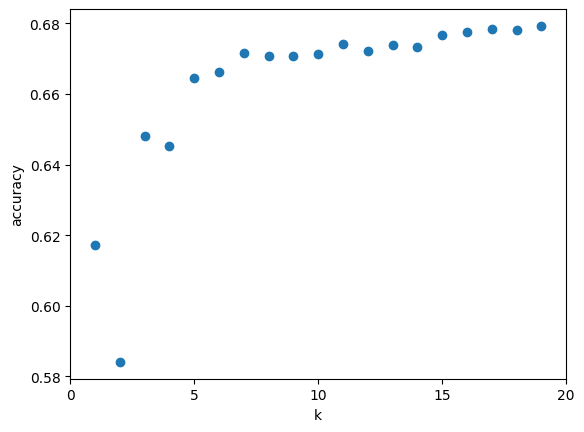

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entreno, y_entreno)
    scores.append(knn.score(X_entreno, y_entreno))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(X_entreno, y_entreno)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred = knn_model.predict(X_testeo)

In [ ]:
print(classification_report(y_testeo, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      7724
           1       0.67      0.61      0.64      7674

    accuracy                           0.65     15398
   macro avg       0.65      0.65      0.65     15398
weighted avg       0.65      0.65      0.65     15398



##### Conclusión

Con esto, se puede concluir que, en cuanto a precisión del modelo, tiene un mayor acierto cuando los jugadores no sobreviven que cuando lo hacen. Por otra parte, en cuanto a la cantidad de acierto o accuracy, tiene un 65%, lo cual lo hace un modelo poco confiable a la hora de predecir sobrevivencia o no.

#### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_entreno, y_entreno)

In [ ]:
y_pred = svm_model.predict(X_testeo)
print(classification_report(y_testeo, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65      7724
           1       0.65      0.71      0.68      7674

    accuracy                           0.67     15398
   macro avg       0.67      0.67      0.66     15398
weighted avg       0.67      0.67      0.66     15398



#### Conclusión

Con los modelos presentados y probados, el que dio mayor cantida de precisión y de accuracy fue el de regresión logística, con un 84%. Por lo tanto, este modelo será usado para la evaluación.

## Fase 5: Evaluation

### Modelo de Regresión: Regresión Lineal

In [ ]:
model = LinearRegression()
arreglo = [X_train_temp, y_train_temp,"Granadas x DineroEquipo"]
model.fit(arreglo[0], arreglo[1])
dinero_equipo = [5000,10000,15000,20000,25000]
for dinero in dinero_equipo:
  pred = model.predict(np.array([[dinero]]))
  print(f"Para {dinero} de dinero del equipo, se estima un total de {pred[0][0]} granadas lanzadas.\n")

Para 5000 de dinero del equipo, se estima un total de 3.3825334757290535 granadas lanzadas.

Para 10000 de dinero del equipo, se estima un total de 5.346004759741635 granadas lanzadas.

Para 15000 de dinero del equipo, se estima un total de 7.3094760437542154 granadas lanzadas.

Para 20000 de dinero del equipo, se estima un total de 9.272947327766797 granadas lanzadas.

Para 25000 de dinero del equipo, se estima un total de 11.236418611779378 granadas lanzadas.



In [ ]:
for dinero in dinero_equipo:
  media = sin_bajos_ag[sin_bajos_ag["DineroEquipo"]==dinero]["Granadas"].mean()
  print(f"La media de granadas lanzadas para cuando el equipo posee {dinero} de dinero, es de: {media}\n")

La media de granadas lanzadas para cuando el equipo posee 5000 de dinero, es de: 2.1666666666666665

La media de granadas lanzadas para cuando el equipo posee 10000 de dinero, es de: 1.5

La media de granadas lanzadas para cuando el equipo posee 15000 de dinero, es de: 7.0

La media de granadas lanzadas para cuando el equipo posee 20000 de dinero, es de: 8.153846153846153

La media de granadas lanzadas para cuando el equipo posee 25000 de dinero, es de: 11.09375



Con esto, se puede observar que, a medida que la cantidad de dinero del equipo aumenta, el modelo es capaz de predecir de mejor manera, en cuanto a la media, la cantidad de granadas lanzadas. No obstante, sigue siendo un modelo poco aceptado para llevar a desarrollo.

### Modelo de Clasificación: Regresión Logística

In [ ]:
datos = [[15000, 6, 2],[10000, 10, 4],[20000, 3, 4],[18850, 2, 2],[25000, 7, 3]]
for dato in datos:
  escala = scaler.transform(np.array([dato]))
  resultado = logistic_model.predict(escala)
  if resultado == 0:
    print(f"Para cuando el equipo tenga {dato[0]} de dinero, lance {dato[1]} granadas, y hayan {dato[2]} kills, el equipo perderá.")
  else:
    print(f"Para cuando el equipo tenga {dato[0]} de dinero, lance {dato[1]} granadas, y hayan {dato[2]} kills, el equipo ganará.")

[1]
Para cuando el equipo tenga 15000 de dinero, lance 6 granadas, y hayan 2 kills, el equipo ganará.
[0]
Para cuando el equipo tenga 10000 de dinero, lance 10 granadas, y hayan 4 kills, el equipo perderá.
[0]
Para cuando el equipo tenga 20000 de dinero, lance 3 granadas, y hayan 4 kills, el equipo perderá.
[1]
Para cuando el equipo tenga 18850 de dinero, lance 2 granadas, y hayan 2 kills, el equipo ganará.
[1]
Para cuando el equipo tenga 25000 de dinero, lance 7 granadas, y hayan 3 kills, el equipo ganará.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Fase 5: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo